                                                     Customer Sentiment Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from bs4 import BeautifulSoup
import undetected_chromedriver as uc

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from textblob import TextBlob
from nltk import sent_tokenize
import requests
driver = webdriver.Chrome()

                                   
 Section 1: Overview of Data Collection and Cleaning Process
- Selenium WebDriver was used to automate browsing through Flipkart's product review pages for the iPhone 15 (128GB).  
- With the help of BeautifulSoup, the following details were extracted for each review:
- Customer Name
- Rating (1–5 stars)
- Review Text

- Handeled pagination to collect reviews across multiple pages.  
- All extracted data is stored in a Pandas DataFrame for further analysis.


In [2]:

# Initialize WebDriver
driver = webdriver.Chrome()

# Open Flipkart product reviews URL
base_url = """https://www.flipkart.com/apple-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYCQQXYH&marketplace=FLIPKART"""
driver.get(base_url)

# Lists to store data
name = []
review = []
rating = []

# Function to extract data from a page
def extract_data():
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    Names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for i in Names:
         # Store data in list
        name.append(i.text)
        
    Ratings = soup.find_all("div", {"class": "XQDdHH Ga3i8K"})
    for i in Ratings:
        rating.append(i.text)
        
    Reviews = soup.find_all("div", {"class": "ZmyHeo"})
    for i in Reviews:
        review.append(i.text)

    
# Collect data from multiple pages
page_number = 1
while len(name) < 100:
    time.sleep(2)  # Allow the page to load
    extract_data()

    # Check if data length has reached the required number
    if len(name) >= 100:
        break

    # Increment the page number and load the new page
    page_number += 1
    next_page_url = base_url + "&page=" + str(page_number)
    
    try:
        # Open the next page
        driver.get(next_page_url)
        print(f"Navigated to page {page_number}, Collected reviews: {len(name)}")
    except Exception as e:
        print("Error navigating to the next page:", str(e))
        break

# Create a DataFrame
df = pd.DataFrame({"Customer Name": name, "Rating": rating, "Review": review})
driver.quit()
df


Navigated to page 2, Collected reviews: 10
Navigated to page 3, Collected reviews: 20
Navigated to page 4, Collected reviews: 30
Navigated to page 5, Collected reviews: 40
Navigated to page 6, Collected reviews: 50
Navigated to page 7, Collected reviews: 60
Navigated to page 8, Collected reviews: 70
Navigated to page 9, Collected reviews: 80
Navigated to page 10, Collected reviews: 90


,Customer Name,Rating,Review
0,Ajin V,5,High quality camera😍READ MORE
1,Mousam Guha Roy,4,Very niceREAD MORE
2,Arunji Govindaraju,5,Awesome product very happy to hold this. Bette...
3,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
4,Flipkart Customer,5,Awesome photography experience. Battery backup...
...,...,...,...
95,Shivani Jain,5,Awesome😍switch from android to iOSREAD MORE
96,Amitabh Srivastava,5,This is an amazing phone and back side of phon...
97,Sumitra Swain,5,Awasome Phone Awasome Camera🐼........Rest is H...
98,Subhodeep Roy,5,Fully satisfied 👍🏻READ MORE


 Section 2: Data Cleaning and Preprocessing
In this step, I performed basic text cleaning:
 The phrase "READ MORE" was removed from review text for clarity
  
Using NLTK, further cleaned each review by:
- Converting to lowercase
- Removing punctuation, digits, and special characters
- Eliminating common stopwords (e.g., "the", "and", "is")
- Applying lemmatization to reduce words to their base forms


In [3]:
# Removed READ MORE, converted to lowercase
df["Customer Name"] = df["Customer Name"].str.title()
df["Review"]= df["Review"].str.replace("READ MORE", "")
df

,Customer Name,Rating,Review
0,Ajin V,5,High quality camera😍
1,Mousam Guha Roy,4,Very nice
2,Arunji Govindaraju,5,Awesome product very happy to hold this. Bette...
3,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
4,Flipkart Customer,5,Awesome photography experience. Battery backup...
...,...,...,...
95,Shivani Jain,5,Awesome😍switch from android to iOS
96,Amitabh Srivastava,5,This is an amazing phone and back side of phon...
97,Sumitra Swain,5,Awasome Phone Awasome Camera🐼........Rest is H...
98,Subhodeep Roy,5,Fully satisfied 👍🏻


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK resources 
'''
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
'''
# Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and lemmatize text
def clean_and_lemmatize(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & digits
    tokens = nltk.word_tokenize(text)  # tokenize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Overwrite the existing Review column
df['Review'] = df['Review'].apply(clean_and_lemmatize)
df


,Customer Name,Rating,Review
0,Ajin V,5,high quality camera
1,Mousam Guha Roy,4,nice
2,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...
3,Bijaya Mohanty,5,go itamazing onebeautiful camera super fast pr...
4,Flipkart Customer,5,awesome photography experience battery backup ...
...,...,...,...
95,Shivani Jain,5,awesomeswitch android io
96,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...
97,Sumitra Swain,5,awasome phone awasome camerarest history dudu
98,Subhodeep Roy,5,fully satisfied


In [5]:
#  Tokenizing reviews into sentences for detailed sentiment analysis
df['Reviews_1'] = df["Review"].apply(sent_tokenize)
df

,Customer Name,Rating,Review,Reviews_1
0,Ajin V,5,high quality camera,[high quality camera]
1,Mousam Guha Roy,4,nice,[nice]
2,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...,[awesome product happy hold better hand feelma...
3,Bijaya Mohanty,5,go itamazing onebeautiful camera super fast pr...,[go itamazing onebeautiful camera super fast p...
4,Flipkart Customer,5,awesome photography experience battery backup ...,[awesome photography experience battery backup...
...,...,...,...,...
95,Shivani Jain,5,awesomeswitch android io,[awesomeswitch android io]
96,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...,[amazing phone back side phone frozen glass ma...
97,Sumitra Swain,5,awasome phone awasome camerarest history dudu,[awasome phone awasome camerarest history dudu]
98,Subhodeep Roy,5,fully satisfied,[fully satisfied]


 Section 3: Sentiment Analysisusing TextBlob
 
 I used TextBlob, a powerful NLP library, to perform sentiment analysis on each customer review.

- First, each sentence within a review was analyzed individually to calculate its polarity score (ranging from -1 to +1).
- Then computed an average polarity score for each review to represent its overall sentiment.
- Based on the polarity score, reviews were categorized into the following custom sentiment labels:
  - `Extremely positive` (polarity ≥ 0.75)
  - `Positive` (0 ≤ polarity < 0.75)
  - `Neutral` (polarity == 0)
  - `Negative` (-0.75 ≥ polarity < 0)
  - `Extremely negative` (polarity < -0.75)

- Finally, the average polarity across all reviews was computed to determine the overall customer sentiment toward the product.
- Majority of reviews were positive, showing high customer satisfaction.
- The overall average polarity across all reviews were positive, further validating the sentiment

In [6]:
# get the polarity
from textblob import blob
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df["polarity"] = df["Reviews_1"].apply(get_polarity)
df

,Customer Name,Rating,Review,Reviews_1,polarity
0,Ajin V,5,high quality camera,[high quality camera],[0.16]
1,Mousam Guha Roy,4,nice,[nice],[0.6]
2,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...,[awesome product happy hold better hand feelma...,[0.5925925925925926]
3,Bijaya Mohanty,5,go itamazing onebeautiful camera super fast pr...,[go itamazing onebeautiful camera super fast p...,[0.26666666666666666]
4,Flipkart Customer,5,awesome photography experience battery backup ...,[awesome photography experience battery backup...,[0.7333333333333334]
...,...,...,...,...,...
95,Shivani Jain,5,awesomeswitch android io,[awesomeswitch android io],[0.0]
96,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...,[amazing phone back side phone frozen glass ma...,[0.23333333333333336]
97,Sumitra Swain,5,awasome phone awasome camerarest history dudu,[awasome phone awasome camerarest history dudu],[0.0]
98,Subhodeep Roy,5,fully satisfied,[fully satisfied],[0.5]


In [7]:
# calculate average polarity
from statistics import mean
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df['Average_polarity'] = df["polarity"].apply(calculate_average_polarity)
df.head(10)

,Customer Name,Rating,Review,Reviews_1,polarity,Average_polarity
0,Ajin V,5,high quality camera,[high quality camera],[0.16],0.160000
1,Mousam Guha Roy,4,nice,[nice],[0.6],0.600000
2,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...,[awesome product happy hold better hand feelma...,[0.5925925925925926],0.592593
3,Bijaya Mohanty,5,go itamazing onebeautiful camera super fast pr...,[go itamazing onebeautiful camera super fast p...,[0.26666666666666666],0.266667
4,Flipkart Customer,5,awesome photography experience battery backup ...,[awesome photography experience battery backup...,[0.7333333333333334],0.733333
5,Nikhil Kumar,5,switch oneplus iphone stunned camera performan...,[switch oneplus iphone stunned camera performa...,[1.0],1.000000
6,Prithivi Boruah,5,camera quality improved loving,[camera quality improved loving],[0.6],0.600000
7,Rahul Shedge,5,totally happycamera battery display design,[totally happycamera battery display design],[0.0],0.000000
8,Kriti Customer,5,loved product colour design wow camera amazing...,[loved product colour design wow camera amazin...,[0.4125],0.412500
9,Varsha Sadanand Salve,5,iphone exceeded expectation every way possible...,[iphone exceeded expectation every way possibl...,[0.48571428571428577],0.485714


In [8]:
# Classifying reviews into sentiment categories based on average polarity score
def sentiment(pol):
    if pol>=0.75:
     return "Extremely positive"
    elif pol>=0:
        return "Positive"
    elif pol ==0:
        return "Neutral"
    elif pol <= -0.75:
        return "Negative"
    else:
        return "Extremely negative"

df["Sentiment"] = df["Average_polarity"].apply(sentiment)
df

,Customer Name,Rating,Review,Reviews_1,polarity,Average_polarity,Sentiment
0,Ajin V,5,high quality camera,[high quality camera],[0.16],0.160000,Positive
1,Mousam Guha Roy,4,nice,[nice],[0.6],0.600000,Positive
2,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...,[awesome product happy hold better hand feelma...,[0.5925925925925926],0.592593,Positive
3,Bijaya Mohanty,5,go itamazing onebeautiful camera super fast pr...,[go itamazing onebeautiful camera super fast p...,[0.26666666666666666],0.266667,Positive
4,Flipkart Customer,5,awesome photography experience battery backup ...,[awesome photography experience battery backup...,[0.7333333333333334],0.733333,Positive
...,...,...,...,...,...,...,...
95,Shivani Jain,5,awesomeswitch android io,[awesomeswitch android io],[0.0],0.000000,Positive
96,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...,[amazing phone back side phone frozen glass ma...,[0.23333333333333336],0.233333,Positive
97,Sumitra Swain,5,awasome phone awasome camerarest history dudu,[awasome phone awasome camerarest history dudu],[0.0],0.000000,Positive
98,Subhodeep Roy,5,fully satisfied,[fully satisfied],[0.5],0.500000,Positive


In [9]:
# Calculating the overall average polarity score across all reviews
df['Average_polarity'].mean()
# The reviews are positive overall for iphone 15 128 gb

np.float64(0.5200890331890331)

 Section 4: Visualizations and  Analytical Insights
To better understand customer sentiment and trends in the reviews, I performed a set of visual analyses:

 Sentiment Distribution
- A bar chart was created to show the percentage of reviews in each sentiment category.
- This gives a clear overview of how many reviews are positive, negative, or fall into extreme categories.

 Word Clouds for Positive & Negative Reviews
-  generated two separate word clouds to highlight the most frequently used words in:
  - Positive Reviews (including "Extremely Positive")
  - Negative Reviews (including "Extremely Negative")
- This helped identify key aspects that customers frequently praised or complained about.

Review Length Analysis
- A box plot was created to examine the relationship between review length and sentiment.
- Insight: Positive reviews tend to be longer, indicating more detailed and expressive feedback, while negative reviews are usually shorter.

Rating vs Sentiment Correlation
-  mapped sentiment labels to numerical values (e.g., Positive = 1, Negative = -1) to analyze correlation.
- A scatter plot was used to visualize the relationship between star ratings and calculated sentiment.
- A positive correlation was observed, validating that higher ratings align with more positive sentiment.


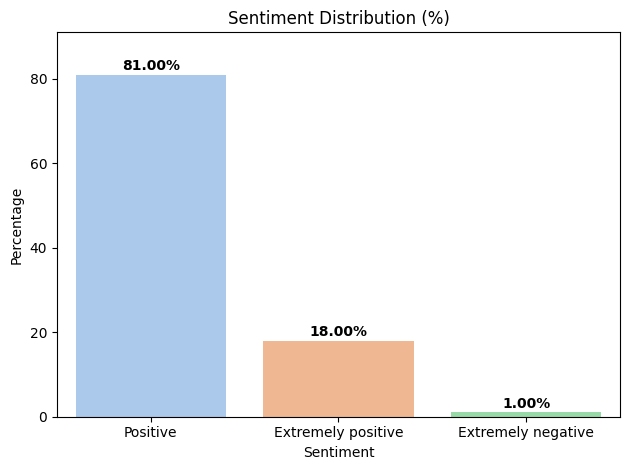

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment percentages
sentiment_percent = df['Sentiment'].value_counts(normalize=True) * 100
sentiment_df = sentiment_percent.reset_index()
sentiment_df.columns = ['Sentiment', 'Percentage']


ax = sns.barplot(x='Sentiment', y='Percentage', hue='Sentiment',
                 data=sentiment_df, palette='pastel', legend=False)

# Add percentage labels above bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,
            f'{p.get_height():.2f}%',
            ha='center', fontweight='bold')


plt.title("Sentiment Distribution (%)")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.ylim(0, sentiment_df['Percentage'].max() + 10)
plt.tight_layout()
plt.show()



In [11]:
df

,Customer Name,Rating,Review,Reviews_1,polarity,Average_polarity,Sentiment
0,Ajin V,5,high quality camera,[high quality camera],[0.16],0.160000,Positive
1,Mousam Guha Roy,4,nice,[nice],[0.6],0.600000,Positive
2,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...,[awesome product happy hold better hand feelma...,[0.5925925925925926],0.592593,Positive
3,Bijaya Mohanty,5,go itamazing onebeautiful camera super fast pr...,[go itamazing onebeautiful camera super fast p...,[0.26666666666666666],0.266667,Positive
4,Flipkart Customer,5,awesome photography experience battery backup ...,[awesome photography experience battery backup...,[0.7333333333333334],0.733333,Positive
...,...,...,...,...,...,...,...
95,Shivani Jain,5,awesomeswitch android io,[awesomeswitch android io],[0.0],0.000000,Positive
96,Amitabh Srivastava,5,amazing phone back side phone frozen glass mak...,[amazing phone back side phone frozen glass ma...,[0.23333333333333336],0.233333,Positive
97,Sumitra Swain,5,awasome phone awasome camerarest history dudu,[awasome phone awasome camerarest history dudu],[0.0],0.000000,Positive
98,Subhodeep Roy,5,fully satisfied,[fully satisfied],[0.5],0.500000,Positive


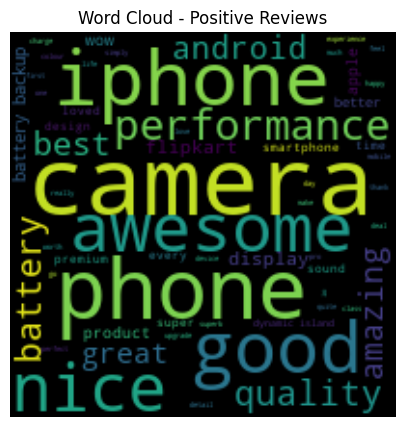

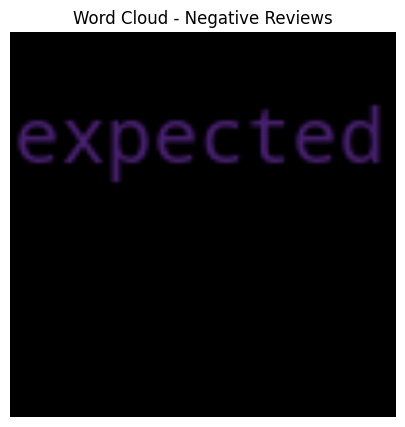

In [12]:
# Generating word clouds for visualizing the most frequently used words 
# in positive and negative reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine positive sentiments
positive_reviews = df[df['Sentiment'].isin(['Positive', 'Extremely positive'])]['Review']
negative_reviews = df[df['Sentiment'].isin(['Negative', 'Extremely negative'])]['Review']

# Join text into one string
pos_text = ' '.join(positive_reviews)
neg_text = ' '.join(negative_reviews)

# Positive Word Cloud
wordcloud_pos = WordCloud(background_color='black', width=200, height=200).generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

# Negative Word Cloud
wordcloud_neg = WordCloud(background_color='black', width=100, height=100).generate(neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()



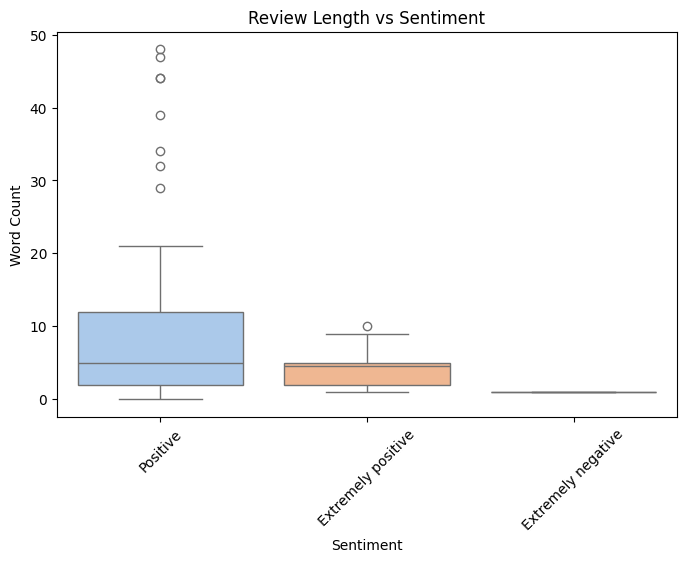

In [13]:
#  Review Length Analysis
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Review_Length', hue='Sentiment', data=df, palette='pastel', legend=False)
plt.title('Review Length vs Sentiment')
plt.ylabel('Word Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.show()



Correlation:                  Rating  sentiment_num
Rating         1.000000       0.049485
sentiment_num  0.049485       1.000000


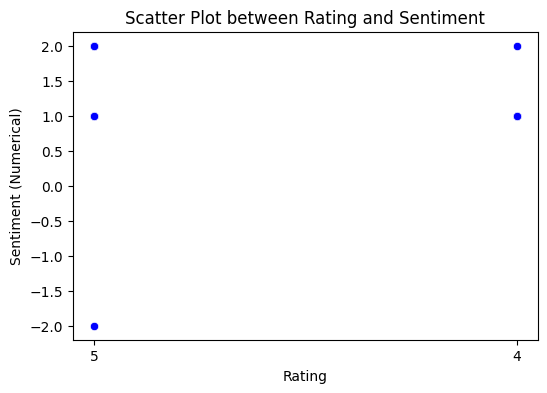

In [14]:
# Rating vs Sentiment:
sentiment_mapping = {
    'Extremely positive': 2,
    'Positive': 1,
    'Negative': -1,
    'Extremely negative': -2
}
df['sentiment_num'] = df['Sentiment'].map(sentiment_mapping)

# Calculate correlation
correlation = df[['Rating', 'sentiment_num']].corr()
print("Correlation:", correlation)


# Plotting the correlation

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Rating', y='sentiment_num', data=df, color="blue")
plt.title('Scatter Plot between Rating and Sentiment')
plt.xlabel('Rating')
plt.ylabel('Sentiment (Numerical)')
plt.show()

                                                 Keys Insights from Analysis

- The majority of customer reviews for the iPhone 15 (128 GB) were positive, with a high average sentiment polarity.
- Customers frequently praised the camera quality, battery performance, and overall design, as seen in both sentiment analysis and word cloud results.
- Longer reviews were often more positive and detailed, suggesting high engagement from satisfied users.
- A clear positive correlation was observed between star ratings and sentiment polarity, validating the accuracy of our sentiment classification.

Overall, the product is well-received, with strong sentiment consistency between textual reviews and star ratings.

